# Weekly Project: Predicting Boston Housing prices

In this project, you will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. **Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Your task is to apply a machine learning model of your choice to predict the price of houses in a Boston neighborhood (which is column 'MEDV')


The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


Here are the few steps you can follow



# Step 1: Data Exploration (EDA)
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Overview data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Data visualization

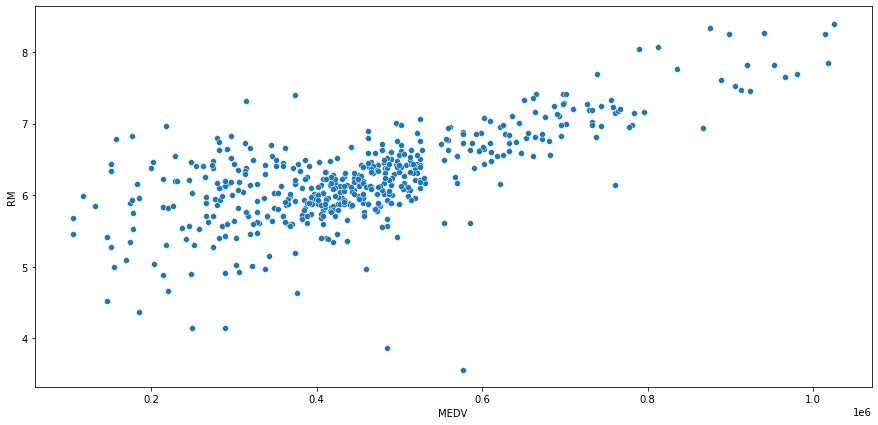

In [ ]:
# relation of RM and MEDV
RM = df[['RM','MEDV']]
plt.figure(figsize=(15,7))
sns.scatterplot(data=RM, x='MEDV', y='RM')

From the scatter chart, we can say that RM and MEDV have the relation to each other (RM increase lead to increase of MEDV)

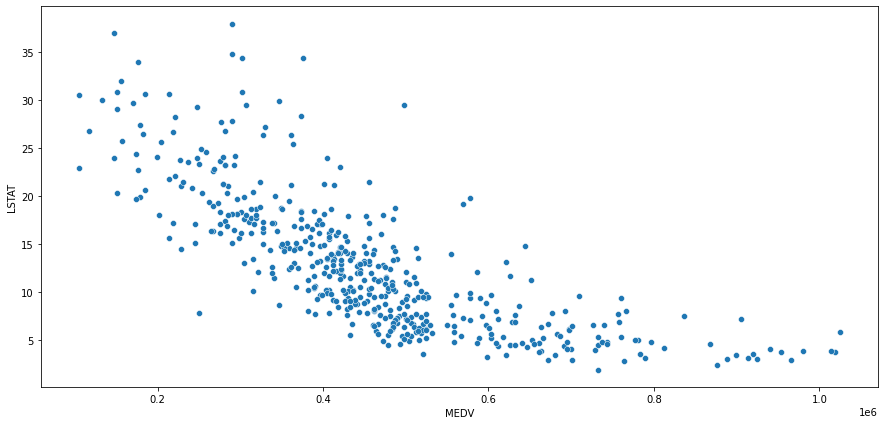

In [ ]:
LSTAT = df[['LSTAT','MEDV']]
plt.figure(figsize=(15,7))
sns.scatterplot(data=LSTAT, x='MEDV', y='LSTAT')

From the scatter chart, we can say that LSTAT and MEDV have the relation to each other (LSTAT decrease lead to increase of MEDV)

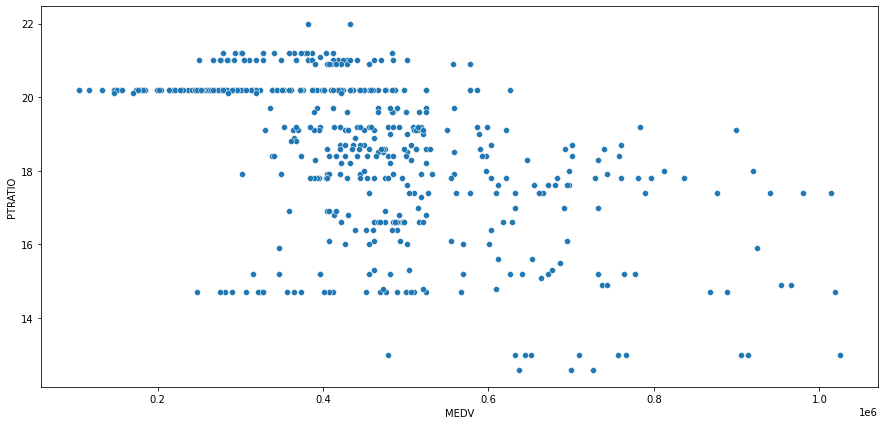

In [ ]:
PTRATIO = df[['PTRATIO','MEDV']]
plt.figure(figsize=(15,7))
sns.scatterplot(data=PTRATIO, x='MEDV', y='PTRATIO')

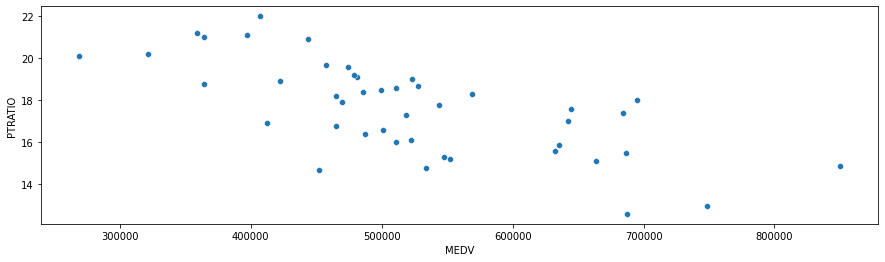

In [ ]:
PTRATIO = df.groupby('PTRATIO')['MEDV'].mean().reset_index()
plt.figure(figsize=(15,4))
sns.scatterplot(data=PTRATIO, x='MEDV', y='PTRATIO')

From the scatter chart, we can say that PTRATIO and MEDV have the relation to each other (PTRATIO decrease lead to increase of MEDV)

# Step 2: Get to know our performance Metric

Do a quick read on R2 score, because that is going to be the metric we are going to use for this task.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

**Question**: what is the range of R2? How can we know if a model performs well or not by using R2 score?

**Answer**: between **0 and 1** and it can be negative (because the model can be arbitrarily worse)

**Question**: Calculate R2 score on these data points
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

**Answer**: The R2 score is 0.92 so it's a good model

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
r2_score(y_true, y_pred)

0.9228556485355649

# Step 3: Train our machine learning model

There won't be much guidance for this step. Your task is to pick and train a machine learning model on this dataset to predict the house price. Make sure to follow all the recommended practices we mention in class. And make sure to finetune your model and pick the best set of hyperparameters (using cross_val_score)


Bonus part: if you want to make your whole finetuning model painless, take a look at GridSearchCV. Read the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, and user guide here: https://scikit-learn.org/stable/modules/grid_search.html#grid-search



In [ ]:
X = df.drop(columns='MEDV')
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
def print_top_k_params(cv_results, k, greater_is_better=False,cv=5,show_split_score=True):
    mult=1 if greater_is_better else -1
    list_of_split_score = [cv_results[f'split{i}_test_score'] for i in range(cv)]
    sorted_result = sorted(zip(mult*cv_results['mean_test_score'],cv_results['std_test_score'],cv_results['params'],*list_of_split_score),
                           key= lambda x: x[0],reverse=greater_is_better)
    sorted_result = sorted_result[:k]
    for i,(score,std,params,*scores) in enumerate(sorted_result):
        print('-'*10)
        print(f'#{i+1} with mean score: {score:.4f}, score std: {std:.4f}')
        if show_split_score:
            print(f'Scores {cv} folds: {[round(mult*s,4) for s in scores]}')
        print(f'Hyperparams: {params}')

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# pipe2 = Pipeline([('scaler', StandardScaler()),
#                   ('model', LinearRegression())])
ln = LinearRegression(normalize=True)
ln.fit(X_train, y_train)
y_train_pred2 = ln.predict(X_train)
y_test_pred2 = ln.predict(X_test)
print(f'ACC train: {ln.score(X_train, y_train)}')
print(f'ACC test: {ln.score(X_test, y_test)}',end='\n\n')
print(f'R2 train: {r2_score(y_train, y_train_pred2)}')
print(f'R2 test: {r2_score(y_test, y_test_pred2)}')

ACC train: 0.7152123258776618
ACC test: 0.7126646671224833

R2 train: 0.7152123258776618
R2 test: 0.7126646671224833


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe4 = Pipeline([('scaler', StandardScaler()),
                 ('model', LinearRegression())])
pipe4.fit(X_train, y_train)
y_pd = pipe4.predict(X_train)
y_test_pd = pipe4.predict(X_test)
y_tt_pd = pipe4.predict(X)
print(f'R2 score on train set: {r2_score(y_train, y_pd)}')
print(f'R2 score on test set: {r2_score(y_test, y_test_pd)}')

R2 score on train set: 0.7152123258776618
R2 score on test set: 0.7126646671224833


### Ridge

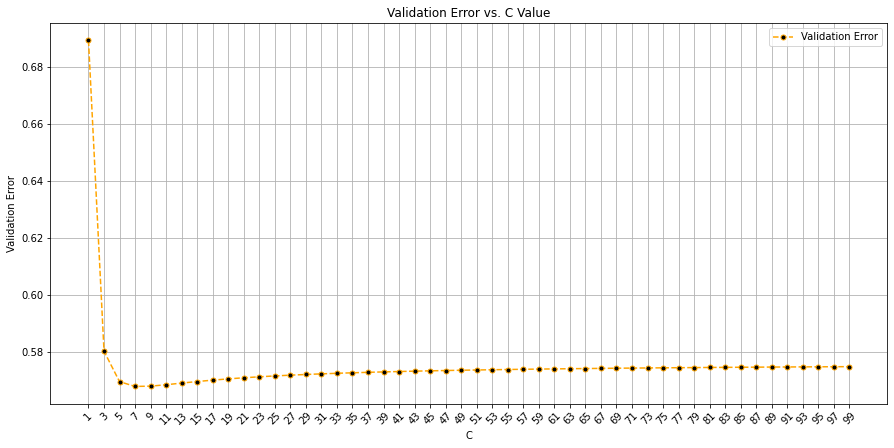

In [ ]:
from sklearn.model_selection import cross_val_score
val_error_rate = []
C = range(1,100,2) # hyperparameters
for i in C:
    ridge = Ridge(alpha=(1/i),normalize=True)
    val_error = 1 - cross_val_score(ridge, X, y, cv=5,scoring='r2').mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)

plt.figure(figsize=(15,7))
plt.plot(C, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(C.start, C.stop, C.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
ridge = Ridge(alpha=(1/7))
ridge.fit(X_train, y_train)
y_train_pred3 = ridge.predict(X_train)
y_test_pred3 = ridge.predict(X_test)

print(f'ACC train: {ridge.score(X_train, y_train)}')
print(f'ACC test: {ridge.score(X_test, y_test)}',end='\n\n')
print(f'R2 train: {r2_score(y_train, y_train_pred3)}')
print(f'R2 test: {r2_score(y_test, y_test_pred3)}')

ACC train: 0.7152122138496927
ACC test: 0.7125757718131878

R2 train: 0.7152122138496927
R2 test: 0.7125757718131878


## PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
ln.fit(X_train_poly, y_train)
y_poly_pred = ln.predict(X_train_poly)
y_test_poly_pred = ln.predict(X_test_poly)
print(r2_score(y_train, y_poly_pred))
print(r2_score(y_test, y_test_poly_pred))


0.8590230403767662
0.8456146639153608


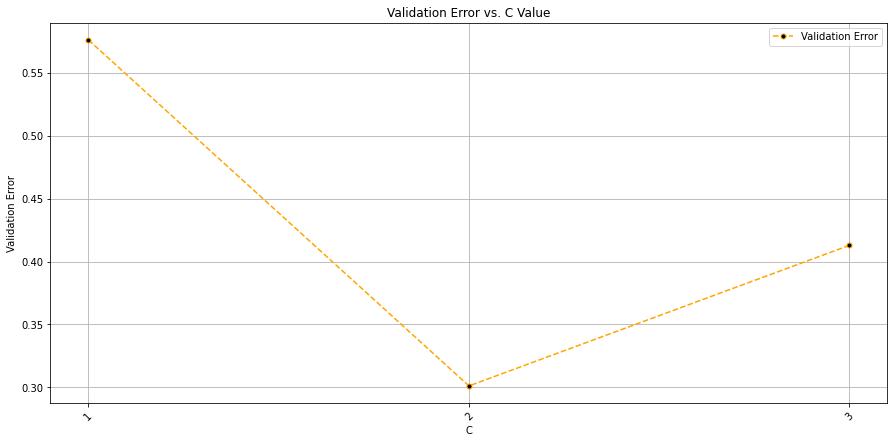

In [ ]:
from sklearn.model_selection import cross_val_score
val_error_rate = []

C = range(1,4) # hyperparameters
for i in C:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    val_error = 1 - cross_val_score(ln, X_poly, y, cv=5,scoring='r2').mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)

plt.figure(figsize=(15,7))
plt.plot(C, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(C.start, C.stop, C.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

## KNeighborsRegressor

### No Preprocessing

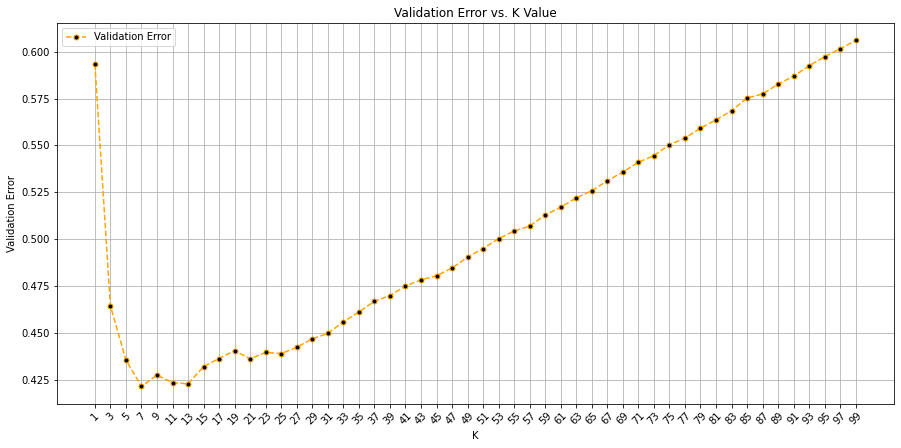

In [ ]:

from sklearn.neighbors import KNeighborsRegressor

val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
for i in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=i, p=2)
    val_error = 1 - cross_val_score(knn, X, y, cv=5).mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
kn = KNeighborsRegressor(n_neighbors=7, p=2)
kn.fit(X_train,y_train)
y_train_pred = kn.predict(X_train)
y_test_pred = kn.predict(X_test)
print(f'ACC train: {kn.score(X_train, y_train)}')
print(f'ACC test: {kn.score(X_test, y_test)}',end='\n\n')
print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
# print(f'')
# kn.score(X_test, y_test)

ACC train: 0.8245507521089721
ACC test: 0.7978119777797591

R2 train: 0.8245507521089721
R2 test: 0.7978119777797592


### Compare MinMaxScaler & StandardScaler

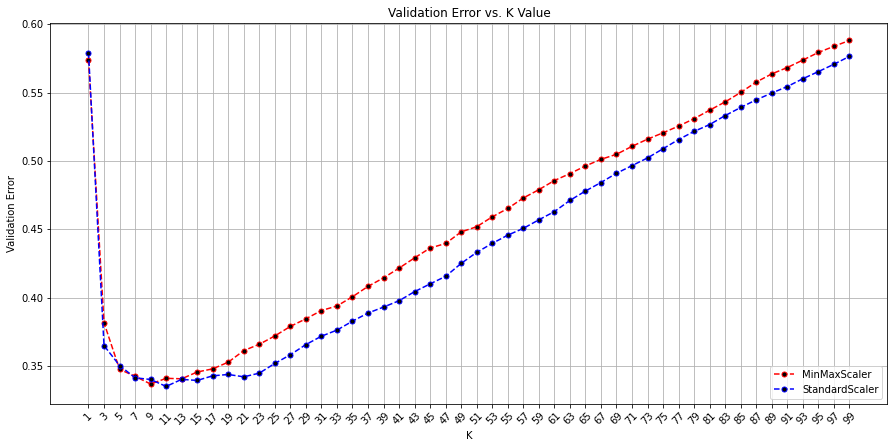

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X_mms = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
for i in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=i, p=2)
    val_error = 1 - cross_val_score(knn, X_mms, y, cv=5).mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='MinMaxScaler')

val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
for i in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=i, p=2)
    val_error = 1 - cross_val_score(knn, X_std, y, cv=5).mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)

plt.plot(neighbors_range, val_error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='StandardScaler')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor(n_neighbors=11, p=2))])
pipe.fit(X_train, y_train)
y_pd = pipe.predict(X_train)
y_test_pd = pipe.predict(X_test)
y_tt_pd = pipe.predict(X)
print(f'R2 Score on Train set: {r2_score(y_train, y_pd)}')
print(f'R2 Score on Test set: {r2_score(y_test, y_test_pd)}')
print(f'R2 Score on the whole data set: {r2_score(y, y_tt_pd)}')

R2 Score on Train set: 0.8441124275862348
R2 Score on Test set: 0.8514107070499728
R2 Score on the whole data set: 0.8463812998624984


In [ ]:
X_transformed = pipe['scaler'].fit_transform(X)
X_transformed

array([[ 0.52055395, -1.1250769 , -1.5250831 ],
       [ 0.28104837, -0.53706982, -0.33974768],
       [ 1.46924486, -1.25935736, -0.33974768],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167],
       [ 0.86114953, -0.91305511,  1.17748167],
       [-0.32704695, -0.71516812,  1.17748167]])

## GridSearchCV

In [ ]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import GridSearchCV
ks = range(1,20,2)
# weight =['uniform', 'distance']
# p = [1, 2]
model = KNeighborsRegressor()
KNN = GridSearchCV(model, param_grid=dict(n_neighbors=ks), cv=5, scoring='r2')
KNN.fit(X_transformed, y)
# print(KNN.best_score_)
print(KNN.best_estimator_)
print(KNN.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')
{'n_neighbors': 11}


In [ ]:
ks = range(1,20,2)
weight =['uniform', 'distance']
p = [1, 2]
model = KNeighborsRegressor()
KNN = GridSearchCV(model, param_grid=dict(n_neighbors=ks, p=p, weights=weight), cv=5, scoring='r2')
KNN.fit(X_transformed, y)
print(KNN.best_score_)
print(KNN.best_estimator_)
print(KNN.best_params_)

0.6786880073546822
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=1,
                    weights='distance')
{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
pipe3 = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor(n_neighbors=15, p=1, weights='distance'))])
pipe3.fit(X_train, y_train)
y_pd2 = pipe3.predict(X_train)
y_test_pd2 = pipe3.predict(X_test)
y_total2 = pipe3.predict(X)
print(f'R2 score on Train set: {r2_score(y_train, y_pd2)}')
print(f'R2 score on test set: {r2_score(y_test, y_test_pd2)}')
print(f'R2 score on the whole set: {r2_score(y, y_total2)}')

R2 score on Train set: 1.0
R2 score on test set: 0.844243509292451
R2 score on the whole set: 0.9665067013740838


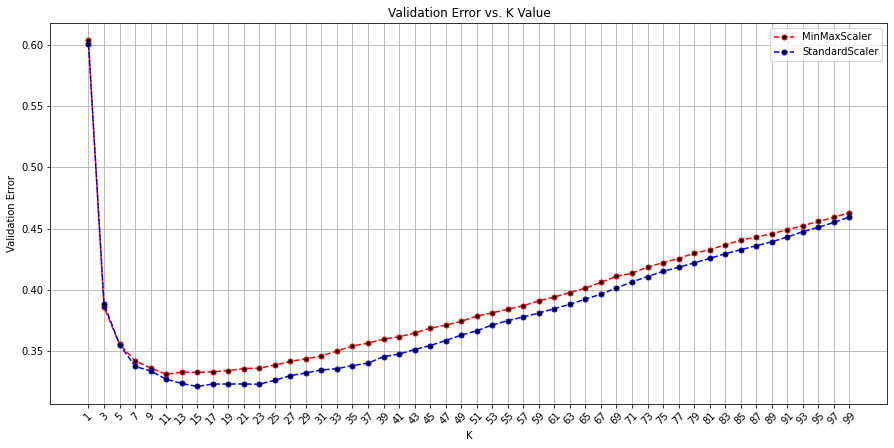

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X_mms = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
for i in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=i, p=1, weights='distance')
    val_error = 1 - cross_val_score(knn, X_mms, y, cv=5).mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='MinMaxScaler')

val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
for i in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=i, p=1, weights='distance')
    val_error = 1 - cross_val_score(knn, X_std, y, cv=5).mean() # accuracy => error: 1 - accuracy
    val_error_rate.append(val_error)

plt.plot(neighbors_range, val_error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='StandardScaler')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

## Choosing model

With result above, KNeighborsRegression model, with **{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}** have the best result. But R2 100% score on Train Set is a suspicious result (compare to test set is only 84,4%)

So i decide to choose KNeighborsRegression model, with **{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}**, with lower score on train set result but same as test set score compare with the model above.

# Step 4: Reporting your R2 score

Record your best R2 score here (from cross validation score). If you perform train/test split, record your R2 score on test set here as well.

In [ ]:
# Considered model: KNN {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
y_pd = pipe3.predict(X_train)
y_total_pd = pipe3.predict(X)
y_test_pd = pipe3.predict(X_test)
print(f'R2 Score on Train set: {r2_score(y_train, y_pd)}')
print(f'R2 Score on Test set: {r2_score(y_test, y_test_pd)}')
print(f'R2 Score on the whole data set: {r2_score(y, y_total_pd)}')
print(f'Best Cross Valdidation score (Mean): {cross_val_score(KNeighborsRegressor(n_neighbors=15, p=1, weights="distance"), X_std, y, cv=5).mean()}')

R2 Score on Train set: 1.0
R2 Score on Test set: 0.844243509292451
R2 Score on the whole data set: 0.9665067013740838
Best Cross Valdidation score (Mean): 0.6786880073546822


In [ ]:
# Chosen model: KNN {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
y_pd = pipe.predict(X_train)
y_total_pd = pipe.predict(X)
y_test_pd = pipe.predict(X_test)
print(f'R2 Score on Train set: {r2_score(y_train, y_pd)}')
print(f'R2 Score on Test set: {r2_score(y_test, y_test_pd)}')
print(f'R2 Score on the whole data set: {r2_score(y, y_total_pd)}')
print(f'Best Cross Valdidation score (Mean): {cross_val_score(KNeighborsRegressor(n_neighbors=11, p=2, weights="uniform"), X_std, y, cv=5).mean()}')

R2 Score on Train set: 0.8405803962808784
R2 Score on Test set: 0.8452868526356568
R2 Score on the whole data set: 0.8423077809651982
Best Cross Valdidation score (Mean): 0.6648200542307642


# Step 5: Making predictions

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

What price would you recommend each client sell his/her home at?
Do these prices seem reasonable given the values for the respective features?

**Answer**: Recommend price for each Client is in the table below. These prices seem reasonable for the respective feature of each house.
And it's in the price range of the true price as well.

In [ ]:
# {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
data = np.array([[5, 17, 15],
                 [4, 32, 22],
                 [8, 3, 12]])
cl = np.array(['Client 1', 'Client 2', 'Client 3'])
X_new = pd.DataFrame(data, columns=['RM', 'LSTAT', 'PTRATIO'])
y_new_pred = pipe.predict(X_new)

columns = pd.DataFrame(y_new_pred.round(), columns=['MEDV'])
client = pd.DataFrame(cl, columns=['Client'])
X_result = pd.concat((X_new, columns, client),axis=1)
X_result

,RM,LSTAT,PTRATIO,MEDV,Client
0,5,17,15,397855.0,Client 1
1,4,32,22,208855.0,Client 2
2,8,3,12,865773.0,Client 3


In [ ]:
# {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
data = np.array([[5, 17, 15],
                 [4, 32, 22],
                 [8, 3, 12]])
cl = np.array(['Client 1', 'Client 2', 'Client 3'])
X_new = pd.DataFrame(data, columns=['RM', 'LSTAT', 'PTRATIO'])
y_new_pred = pipe3.predict(X_new)

columns = pd.DataFrame(y_new_pred.round(), columns=['MEDV'])
client = pd.DataFrame(cl, columns=['Client'])
X_result = pd.concat((X_new, columns, client),axis=1)
X_result

,RM,LSTAT,PTRATIO,MEDV,Client
0,5,17,15,377932.0,Client 1
1,4,32,22,227868.0,Client 2
2,8,3,12,865066.0,Client 3


In [ ]:
df[(df['MEDV'] <= 400000) & (df['MEDV'] > 390000)]

,RM,LSTAT,PTRATIO,MEDV
9,6.004,17.10,15.2,396900.0
11,6.009,13.27,15.2,396900.0
35,5.933,9.68,19.2,396900.0
54,5.888,14.80,21.1,396900.0
60,5.741,13.15,19.7,392700.0
102,6.405,10.63,20.9,390600.0
112,5.913,16.21,17.8,394800.0
113,6.092,17.09,17.8,392700.0
124,5.879,17.58,19.1,394800.0
328,5.985,9.74,20.2,399000.0


In [ ]:
df[(df['MEDV'] <= 220000) & (df['MEDV'] > 190000)]

,RM,LSTAT,PTRATIO,MEDV
362,6.223,21.78,20.2,214200.0
363,6.968,17.21,20.2,218400.0
371,4.880,30.62,20.2,214200.0
375,5.036,25.68,20.2,203700.0
400,5.304,26.64,20.2,218400.0
409,5.837,15.69,20.2,214200.0
412,6.380,24.08,20.2,199500.0
419,6.461,18.05,20.2,201600.0


In [ ]:
df[(df['MEDV'] <= 880000) & (df['MEDV'] > 860000)]

,RM,LSTAT,PTRATIO,MEDV
157,6.943,4.59,14.7,867300.0
224,8.337,2.47,17.4,875700.0


# Step 6: Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?

        We can use data from 1978 but we have to exchange the value of price from that time to current price
        (depend on inflation overtime).

- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

        I think these 3 feature is good features to predicts the price, but if we want to use it in real life situation,
        it'll need much more feature to predict the price of house (square feet, pool, number of floors, furniture,...)

- Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?

        I think our model is not robust enough to make consistent prediction. Because It was trained just a few feature, 
        not enough feature to cover all the situation, place, class,..
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
        No, it need to be consider much more feature
        (e.g. square feet, pool, number of floors, furniture, city, state, country...)